### 分析（中国移动）
- features
    - 实名制是否通过
    - 年龄
    - 是否大学生
    - 是否黑名单 ##############（相关性失真）
    - 是否4G不健康
    - 网龄（月）
    - 最近一次缴费距今（月）
    - 最近一次缴费金额
    - 近六个月平均消费值
    - 当月平均账单
    - 当月账户余额
    - 缴费用户当前是否欠费缴费 ###########（相关性失真）
    - 话费敏感度 ##########（？）
    - 当月通话交往圈人数
    - 是否经常逛商场
    - 近三个月月均商场出现次数
    - 当月是否逛过福州仓山万达
    - 当月是否到过福州山姆会员店
    - 当月是否看电影
    - 当月是否游览景点
    - 当月是否体育馆消费
    - 当月网购应用使用次数
    - 当月物流快递类应用使用次数
    - 当月金融理财类应用使用总次数
    - 当月视频播放类应用使用次数
    - 当月飞机类应用使用次数
    - 当月火车类应用使用次数
    - 当月旅游资讯类应用使用次数

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn import ensemble, tree, linear_model
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

E:\conda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
E:\conda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_train = pd.read_csv('./train_dataset/train_dataset.csv')
data_test = pd.read_csv('./test_dataset/test_dataset.csv')
print('训练集样本大小{0},测试集样本大小{1}'.format(data_train.shape, data_test.shape))

训练集样本大小(50000, 30),测试集样本大小(50000, 29)


In [3]:
#explore the dataset
sns.set(style="whitegrid",color_codes=True)
sns.set(font_scale=1)

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
用户编码               50000 non-null object
用户实名制是否通过核实        50000 non-null int64
用户年龄               50000 non-null int64
是否大学生客户            50000 non-null int64
是否黑名单客户            50000 non-null int64
是否4G不健康客户          50000 non-null int64
用户网龄（月）            50000 non-null int64
用户最近一次缴费距今时长（月）    50000 non-null int64
缴费用户最近一次缴费金额（元）    50000 non-null float64
用户近6个月平均消费值（元）     50000 non-null float64
用户账单当月总费用（元）       50000 non-null float64
用户当月账户余额（元）        50000 non-null int64
缴费用户当前是否欠费缴费       50000 non-null int64
用户话费敏感度            50000 non-null int64
当月通话交往圈人数          50000 non-null int64
是否经常逛商场的人          50000 non-null int64
近三个月月均商场出现次数       50000 non-null int64
当月是否逛过福州仓山万达       50000 non-null int64
当月是否到过福州山姆会员店      50000 non-null int64
当月是否看电影            50000 non-null int64
当月是否景点游览           50000 non-null int64
当月是否体育场馆消费         50000 non-null int64
当月网购

In [5]:
data_train.describe()
data_train.get_dtype_counts()
#coreelation in data
corr=data_train.corr()["信用分"]
print("_______________________________________________")
print(corr[np.argsort(corr, axis=0)[::-1]]) 

_______________________________________________
信用分                1.000000
用户网龄（月）            0.546893
用户近6个月平均消费值（元）     0.493749
当月通话交往圈人数          0.477302
用户账单当月总费用（元）       0.443064
缴费用户最近一次缴费金额（元）    0.333539
当月是否景点游览           0.270870
当月是否体育场馆消费         0.233067
用户最近一次缴费距今时长（月）    0.215252
近三个月月均商场出现次数       0.197827
当月是否看电影            0.165377
当月金融理财类应用使用总次数     0.113808
是否经常逛商场的人          0.113114
是否黑名单客户            0.110549
缴费用户当前是否欠费缴费       0.089803
用户当月账户余额（元）        0.081096
当月视频播放类应用使用次数      0.064864
当月是否到过福州山姆会员店      0.054110
当月是否逛过福州仓山万达       0.051375
用户年龄               0.037780
当月网购类应用使用次数        0.033495
当月火车类应用使用次数        0.032554
用户实名制是否通过核实        0.028927
是否大学生客户            0.025312
当月旅游资讯类应用使用次数      0.020780
当月飞机类应用使用次数        0.014362
当月物流快递类应用使用次数      0.001054
是否4G不健康客户         -0.147162
用户话费敏感度           -0.239400
Name: 信用分, dtype: float64


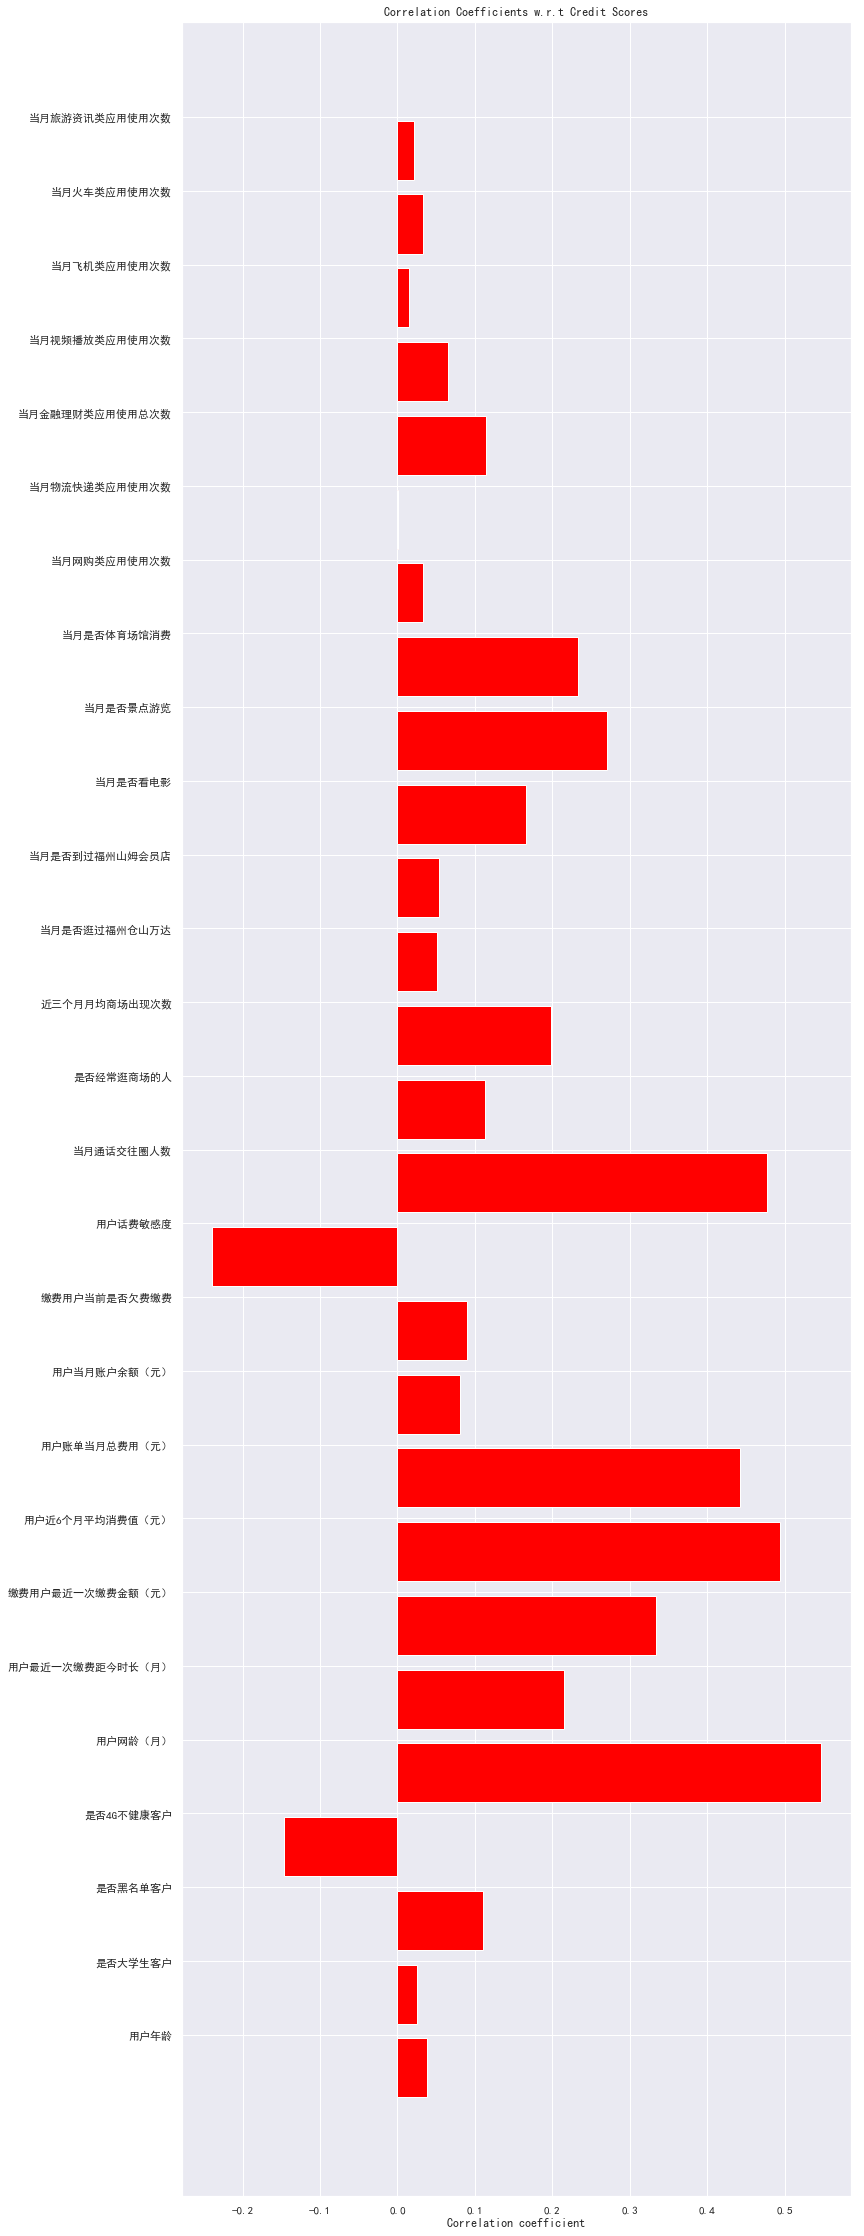

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

# plotting correlations
num_feat = data_train.columns[data_train.dtypes != object]
num_feat = num_feat[1:-1]
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(data_train[col].values, data_train.信用分.values)[0, 1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12, 40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind + ((width) / 2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Credit Scores");

plt.show()

In [7]:
correlations=data_train.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.3  ##
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])),
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

# unique_important_corrs

E:\conda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


,Attribute Pair,Correlation
1,"(用户账单当月总费用（元）, 用户近6个月平均消费值（元）)",0.903464
5,"(用户最近一次缴费距今时长（月）, 缴费用户最近一次缴费金额（元）)",0.550815
2,"(当月通话交往圈人数, 用户近6个月平均消费值（元）)",0.470274
0,"(用户近6个月平均消费值（元）, 缴费用户最近一次缴费金额（元）)",0.459308
4,"(当月通话交往圈人数, 用户账单当月总费用（元）)",0.455292
8,"(用户账单当月总费用（元）, 缴费用户最近一次缴费金额（元）)",0.448055
9,"(当月是否体育场馆消费, 当月是否景点游览)",0.337581
6,"(当月是否体育场馆消费, 近三个月月均商场出现次数)",0.325481
7,"(用户年龄, 用户网龄（月）)",0.317333
3,"(当月是否景点游览, 近三个月月均商场出现次数)",0.309416


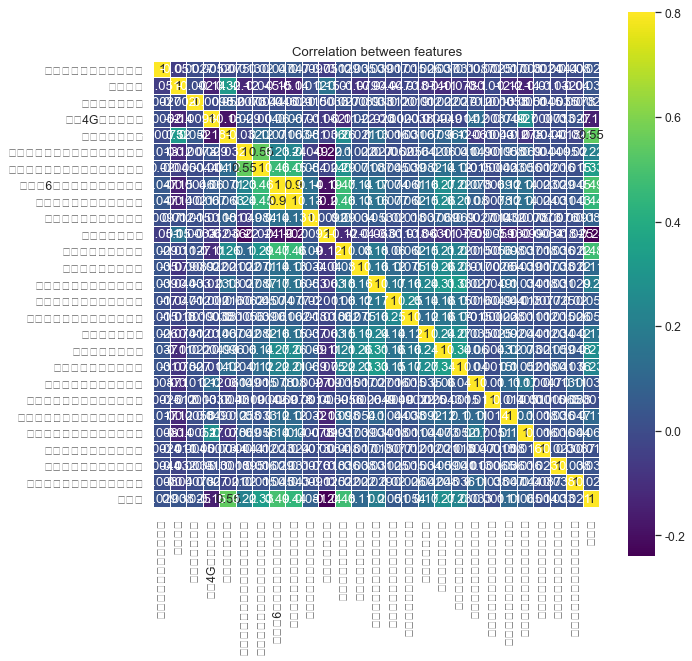

In [8]:
# corrMatrix = data_train.drop(['用户编码','是否黑名单客户','缴费用户当前是否欠费缴费'],axis=1,inplace=False).corr()

# sns.set(font_scale=1.10)
# plt.figure(figsize=(10,10))
# sns.heatmap(corrMatrix,vmax=.8,linewidths=0.01, square=True,annot=True,cmap='viridis',linecolor="white")
# plt.title('Correlation between features')
# plt.show()

In [9]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)
    
# checking for missing data
NAs=pd.concat([data_train.isnull().sum(),data_test.isnull().sum()],axis=1,keys=['Train','Test'])
print(NAs[NAs.sum(axis=1)>0])

Empty DataFrame
Columns: [Train, Test]
Index: []


E:\conda\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [10]:
#spliting to features and lables and deleting variable I don't need
train_labels=data_train.pop('信用分')
features=pd.concat([data_train,data_test],keys=['train','test'])
#get rid of features that have more than half of missing information or do not correlate to SalePrice
features.drop(
    ['用户编码','是否黑名单客户','缴费用户当前是否欠费缴费'],
    axis=1, inplace=True)

E:\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


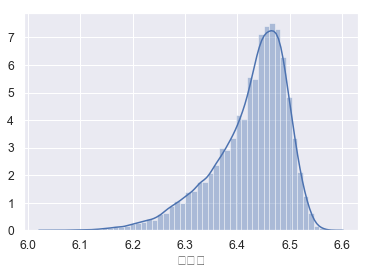

In [11]:
#Log transformation  显示价格区间分布
train_labels=np.log(train_labels)
sns.distplot(train_labels)

In [12]:
def order1(list1):
    ans = [];
    for item in list1:
        ans.append(ord(item)-ord('A'));
    return ans
        
order1(['C','G','I','J','K','L','O','Q','W','Y','Z'])

[2, 6, 8, 9, 10, 11, 14, 16, 22, 24, 25]

In [13]:
# Standardizing numeric data
numeric_features = features.iloc[:,[2,4,6,7,8,9,11,13,19, 21, 22,23,24,25]]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()
# ax = sns.pairplot(numeric_features_standardized)

In [14]:

#Obtaining standardized dataset
### Copying features
features_standardized = features.copy()
### Replacing numeric features by standardized values
features_standardized.update(numeric_features_standardized)

In [17]:
#Splitting train and test features
### Splitting features
train_features = features.loc['train'].select_dtypes(include=[np.number]).values
test_features = features.loc['test'].select_dtypes(include=[np.number]).values

### Splitting standardized features
train_features_st = features_standardized.loc['train'].select_dtypes(include=[np.number]).values
test_features_st = features_standardized.loc['test'].select_dtypes(include=[np.number]).values

In [18]:
#Splitting to train and validation sets
### Shuffling train sets
train_features_st, train_features, train_labels = shuffle(train_features_st, train_features, train_labels)
### Splitting
x_train, x_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.1, random_state=200)
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(train_features_st, train_labels, test_size=0.1, random_state=200)


In [19]:
#用Elastic拟合数字特征
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train_st, y_train_st)
train_test(ENSTest, x_train_st, x_test_st, y_train_st, y_test_st) #RMSE 均方根误差

# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(ENSTest, train_features_st, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.22175427786446777
RMSE: 0.04698288438037335
Test
R2: 0.17482984124134893
RMSE: 0.048746706261202415
Accuracy: 0.56 (+/- 0.02)


In [20]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                           min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train,
                                                                                                        y_train)
train_test(GBest, x_train, x_test, y_train, y_test)

#max_features='sqrt' to reduce overfitting of my model.
#use loss='huber' because it more tolerant to outliers
# All other hyper-parameters was chosen using GridSearchCV

# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, train_features_st, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.7668290717552961
RMSE: 0.03041231957283561
Test
R2: 0.7173965942113028
RMSE: 0.033316270103849376
Accuracy: 0.79 (+/- 0.01)


In [22]:
from sklearn.linear_model import LinearRegression as LR

clf_lr = LR()
#final ensemble model is an average of Gradient Boosting and Elastic Net predictions.


# Retraining models
GB_model = GBest.fit(train_features, train_labels)
ENST_model = ENSTest.fit(train_features_st, train_labels)
LR_model=clf_lr.fit(train_features_st, train_labels.astype('float'))

test=pd.read_csv('./test_dataset/test_dataset.csv')

## Getting our SalePrice estimation
Final_labels = (np.exp(GB_model.predict(test_features)) + np.exp(ENST_model.predict(test_features_st))) / 2
## Saving to CSV
pd.DataFrame({'id': test.用户编码, 'score': Final_labels}).to_csv('result.csv', index =False)

In [30]:
pd.DataFrame({'id': test.用户编码, 'score': Final_labels}).to_csv('result.csv', index =False)

In [29]:
Final_labels = Final_labels.astype(int)